In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data

In [27]:
start = '2010-01-01'
end = date.today().strftime("%Y-%m-%d")

df = data.DataReader('AAPL', 'yahoo' , start , end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544688
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482606


In [28]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-18,166.600006,163.570007,163.919998,165.070007,69023900.0,165.070007
2022-04-19,167.820007,163.910004,165.020004,167.399994,67723800.0,167.399994
2022-04-20,168.880005,166.100006,168.759995,167.229996,67929800.0,167.229996
2022-04-21,171.529999,165.910004,168.910004,166.419998,87227800.0,166.419998
2022-04-22,167.869904,161.500000,166.460007,161.789993,84882424.0,161.789993


In [29]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544688
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482606


In [30]:
df = df.drop(['Date', 'Volume', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close
0,7.660714,7.585000,7.622500,7.643214
1,7.699643,7.616071,7.664286,7.656429
2,7.686786,7.526786,7.656429,7.534643
3,7.571429,7.466071,7.562500,7.520714
4,7.571429,7.466429,7.510714,7.570714


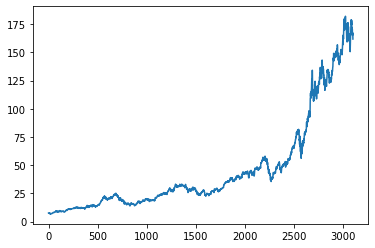

In [31]:
plt.plot(df.Close)

In [32]:
df

,High,Low,Open,Close
0,7.660714,7.585000,7.622500,7.643214
1,7.699643,7.616071,7.664286,7.656429
2,7.686786,7.526786,7.656429,7.534643
3,7.571429,7.466071,7.562500,7.520714
4,7.571429,7.466429,7.510714,7.570714
...,...,...,...,...
3093,166.600006,163.570007,163.919998,165.070007
3094,167.820007,163.910004,165.020004,167.399994
3095,168.880005,166.100006,168.759995,167.229996
3096,171.529999,165.910004,168.910004,166.419998


In [33]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3093    169.2604
3094    169.3203
3095    169.3732
3096    169.4693
3097    169.4848
Name: Close, Length: 3098, dtype: float64

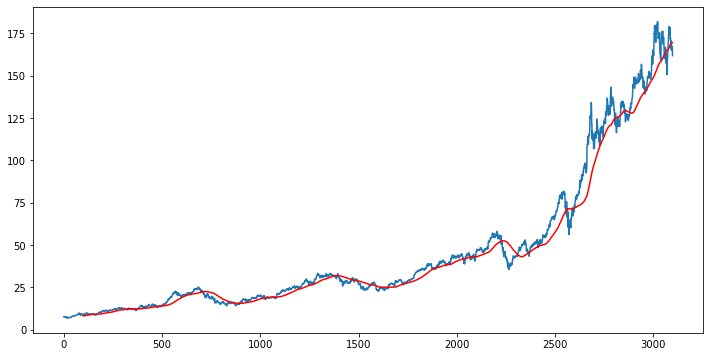

In [34]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [35]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3093    158.50775
3094    158.64495
3095    158.77100
3096    158.88025
3097    158.97300
Name: Close, Length: 3098, dtype: float64

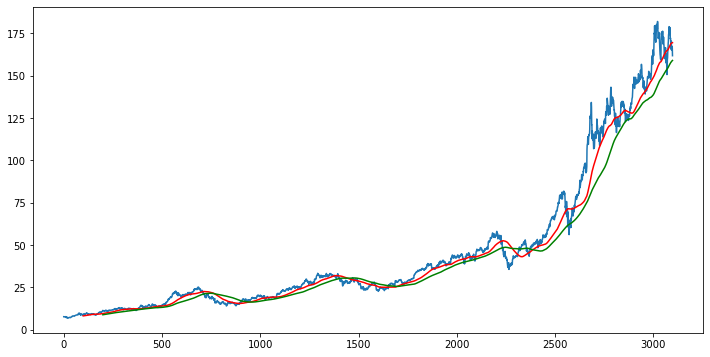

In [36]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [37]:
df.shape

(3098, 4)

In [38]:
#Spliting Data into training and testing

data_training = pd.DataFrame(df['Close'][0: int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2168, 1)
(930, 1)


In [39]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [40]:
data_testing.head()

,Close
2168,52.437500
2169,52.560001
2170,53.330002
2171,54.395000
2172,53.865002


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [42]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01727174],
       [0.01756276],
       [0.01488076],
       ...,
       [0.99895393],
       [0.99152138],
       [0.99889882]])

In [43]:
data_training_array.shape

(2168, 1)

In [46]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100 : i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [47]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [48]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1] ,1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [50]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
65/65 [==============================] - 40s 418ms/step - loss: 0.0313
Epoch 2/50
65/65 [==============================] - 29s 447ms/step - loss: 0.0070
Epoch 3/50
65/65 [==============================] - 26s 408ms/step - loss: 0.0058
Epoch 4/50
65/65 [==============================] - 28s 430ms/step - loss: 0.0055
Epoch 5/50
65/65 [==============================] - 25s 392ms/step - loss: 0.0058
Epoch 6/50
65/65 [==============================] - 29s 452ms/step - loss: 0.0048
Epoch 7/50
65/65 [==============================] - 30s 460ms/step - loss: 0.0046
Epoch 8/50
65/65 [==============================] - 31s 469ms/step - loss: 0.0045
Epoch 9/50
65/65 [==============================] - 29s 443ms/step - loss: 0.0044
Epoch 10/50
65/65 [==============================] - 26s 403ms/step - loss: 0.0050
Epoch 11/50
65/65 [==============================] - 25s 388ms/step - loss: 0.0036
Epoch 12/50
65/65 [==============================] - 29s 443ms/step - loss: 0.0037
Epoch 13/50
6

In [51]:
model.save('keras_model.h5')

In [52]:
data_testing.head()

,Close
2168,52.437500
2169,52.560001
2170,53.330002
2171,54.395000
2172,53.865002


In [54]:
data_training.tail(100)

,Close
2068,42.212502
2069,41.235001
2070,43.192501
2071,42.084999
2072,41.619999
...,...
2163,51.777500
2164,51.812500
2165,52.220001
2166,51.882500


In [55]:
past_100_days = data_training.tail(100)

In [56]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [57]:
final_df.head()

,Close
0,42.212502
1,41.235001
2,43.192501
3,42.084999
4,41.619999


In [58]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04550654],
       [0.03883247],
       [0.05219767],
       ...,
       [0.8990868 ],
       [0.89355639],
       [0.86194417]])

In [60]:
input_data.shape

(1030, 1)

In [62]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [63]:
x_test, y_test = np.array(x_test) , np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(930, 100, 1)
(930,)


In [64]:
y_predicted = model.predict(x_test) 

In [65]:
y_predicted.shape

(930, 1)

In [66]:
y_test

array([0.11531962, 0.11615602, 0.12141334, 0.12868482, 0.12506616,
       0.12434923, 0.12436631, 0.12511736, 0.126261  , 0.12929931,
       0.13230349, 0.13790219, 0.14140138, 0.14583939, 0.14708543,
       0.14454211, 0.13810704, 0.13503457, 0.12996501, 0.13938723,
       0.13464199, 0.14375694, 0.13937014, 0.1291969 , 0.1298114 ,
       0.13003328, 0.13286677, 0.12882138, 0.13416403, 0.13655373,
       0.13353247, 0.14126483, 0.14261331, 0.14520781, 0.1486558 ,
       0.15341813, 0.14645388, 0.14013825, 0.13925067, 0.14454211,
       0.12660237, 0.12334215, 0.13641717, 0.1283093 , 0.13648544,
       0.13484681, 0.12602203, 0.13163779, 0.13392506, 0.13747546,
       0.12443458, 0.13247419, 0.12649996, 0.11956987, 0.1213792 ,
       0.13086968, 0.13660494, 0.1114449 , 0.10139113, 0.10511224,
       0.115661  , 0.11316891, 0.10630708, 0.08872578, 0.08541435,
       0.07614578, 0.08401469, 0.08763335, 0.07454126, 0.05938379,
       0.05904241, 0.05137833, 0.05535546, 0.05470684, 0.06614

In [68]:
y_predicted

array([[0.18662159],
       [0.18839835],
       [0.19012669],
       [0.19179644],
       [0.19343668],
       [0.19505674],
       [0.1966498 ],
       [0.19819555],
       [0.19966444],
       [0.2010405 ],
       [0.20232894],
       [0.20355247],
       [0.20475999],
       [0.20600538],
       [0.2073439 ],
       [0.20880738],
       [0.21038073],
       [0.21198787],
       [0.2135306 ],
       [0.21490523],
       [0.21607609],
       [0.21701294],
       [0.21775603],
       [0.21833251],
       [0.21872266],
       [0.21891257],
       [0.21890286],
       [0.21872154],
       [0.21838856],
       [0.21795481],
       [0.21748641],
       [0.21702284],
       [0.21663547],
       [0.21638596],
       [0.21632475],
       [0.21649298],
       [0.21692854],
       [0.21759585],
       [0.21839896],
       [0.21923476],
       [0.22004406],
       [0.22072038],
       [0.22116983],
       [0.22137552],
       [0.22132292],
       [0.22105566],
       [0.22062561],
       [0.220

In [69]:
scaler.scale_

array([0.00682769])

In [71]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

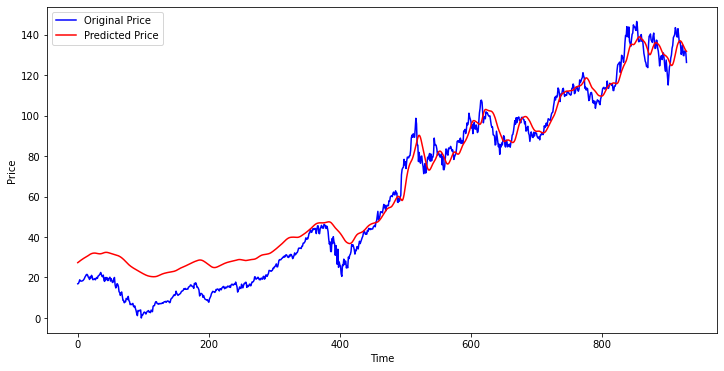

In [72]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()